In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pandas as pd
import cv2
from sklearn.cluster import KMeans
import os
import pandas as pd




In [ ]:
x=[]
y=[]
com = []

def drawImage(img):
  plt.imshow(img)
  plt.show()


In [ ]:
def func(img):
  all_pixels = img.reshape((-1,1)) 
  km = KMeans(n_clusters=2)
  km.fit(all_pixels)
  centers = km.cluster_centers_
  com.append(centers)
  labels =km.labels_
  labels = labels.reshape((100,100))
  newImage = np.zeros((100,100))
  xint=0
  yint =0
  count=0
  for i in range(100):
    for j in range(100):
      if centers[0]<centers[1]:
        if(labels[i][j]==1):
          newImage[i][j]=1
          xint+=i
          yint+=j
          count+=1
        else:
          newImage[i][j]=0
      else:
        if(labels[i][j]==0):
          newImage[i][j]=1
          xint+=i
          yint+=j
          count+=1
        else:
          newImage[i][j]=0
  print(xint,yint)
  x.append(xint/count)
  y.append(yint/count)
  plt.scatter(xint/count,yint/count,c='blue')
  drawImage(newImage)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dirname = '/content/drive/MyDrive/DataSet'
timeaccord= []
for fname in os.listdir(dirname):
  timeaccord.append(fname)
timeaccord.sort()


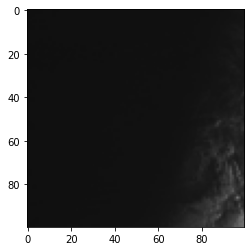

60532 67872


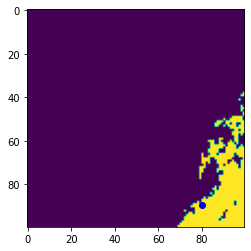

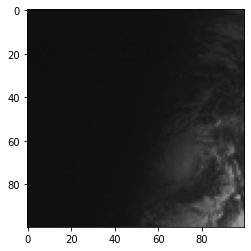

104025 119965


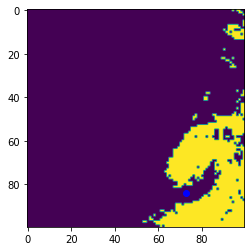

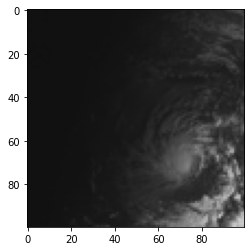

95395 107482


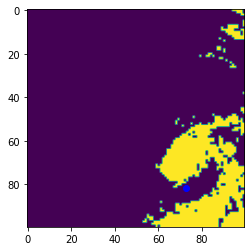

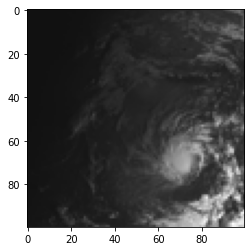

88585 99408


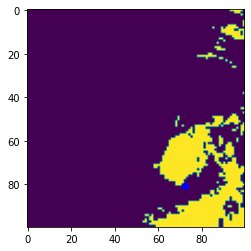

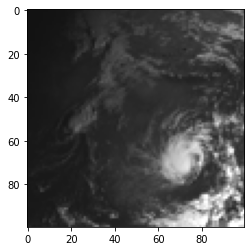

83530 93902


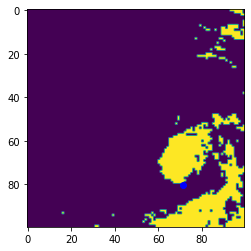

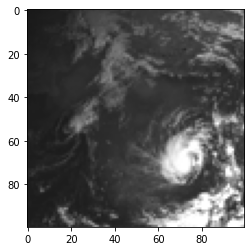

82829 91110


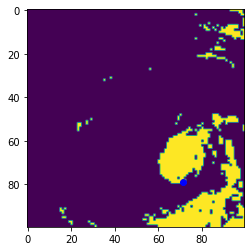

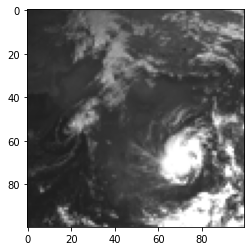

88483 99424


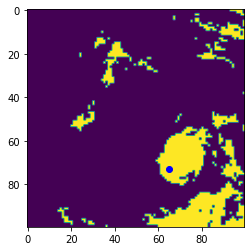

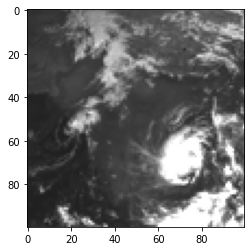

98748 115400


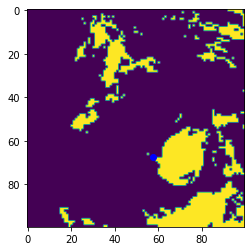

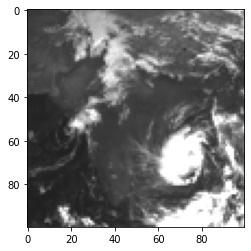

101192 121981


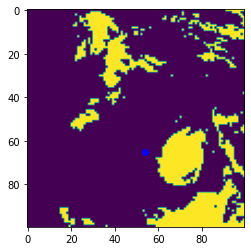

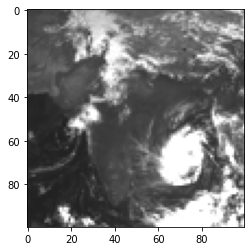

101578 123665


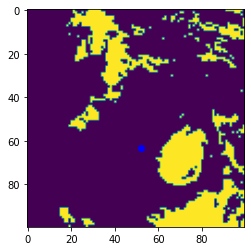

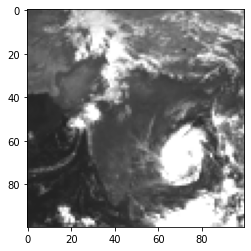

101909 124182


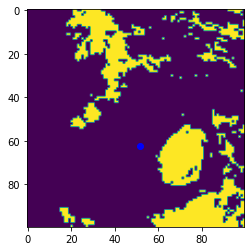

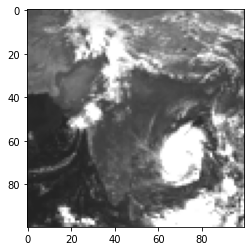

101359 122549


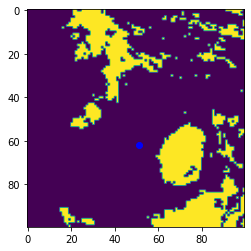

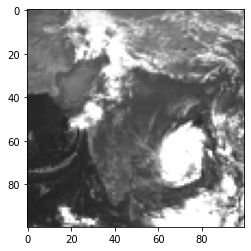

103656 124288


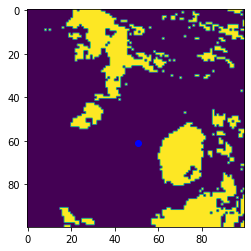

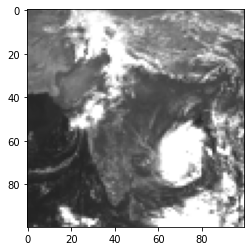

102799 120246


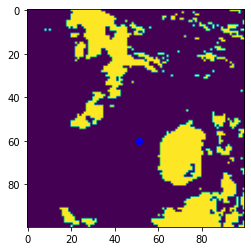

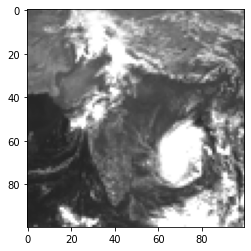

103098 118069


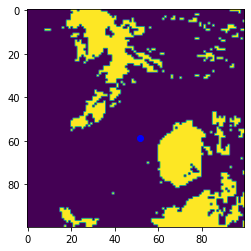

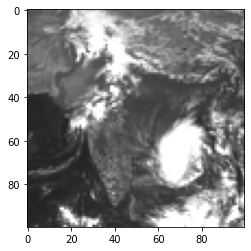

103465 117563


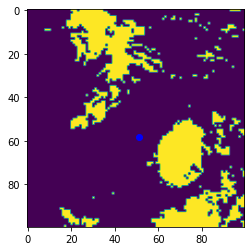

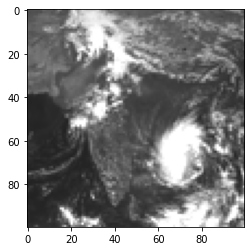

104889 117254


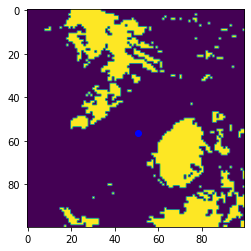

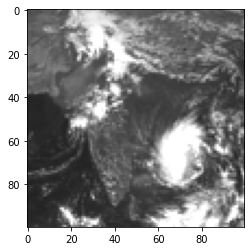

105326 117839


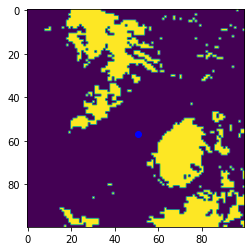

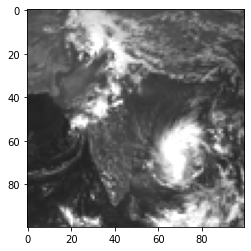

103827 113025


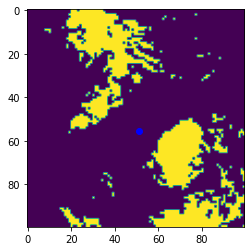

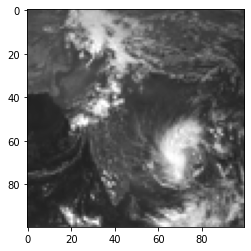

102505 110394


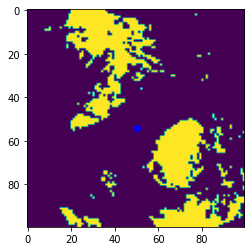

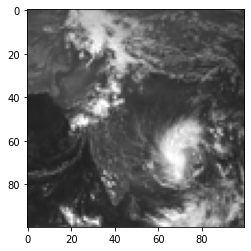

102704 110837


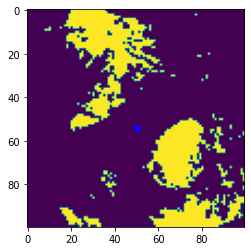

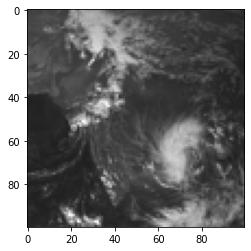

96396 100397


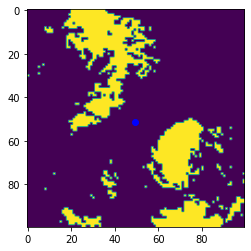

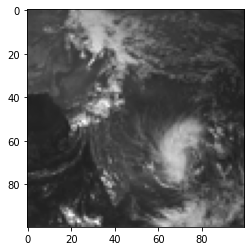

96156 100142


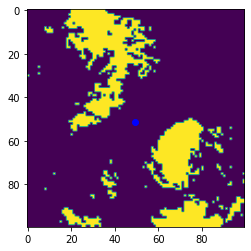

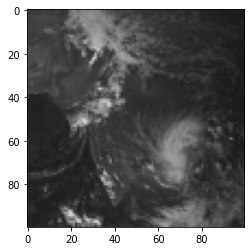

88856 87277


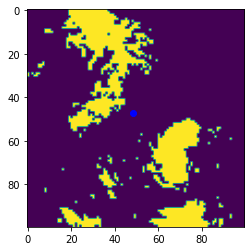

In [ ]:
final = []
for fname in timeaccord[:24]:
    img = Image.open(os.path.join(dirname, fname))
    img = img.resize((100,100))
    drawImage(img)
    imarray = np.array(img)
    func(imarray)
    final.append(imarray)

In [ ]:
cmx =[]
for i in range(24):
  if com[i][0]>com[i][1]:
    cmx.append(com[i][0])
  else:
    cmx.append(com[i][1])

In [ ]:

cmx = np.array(cmx)
cmx_predict = []
cmx_predict2 =[]
for i in range(4):
  cmx_predict.append(cmx[i])
for i in range(4):
  cmx_predict2.append(cmx[i])
for i in range(3,cmx.shape[0]):
  dx = cmx[i-1]-cmx[i-2] 
  xt = cmx[i-1]+dx
  xat = cmx[i]
  dx2 = xat - xt
  cmx_predict.append(xat+dx2)

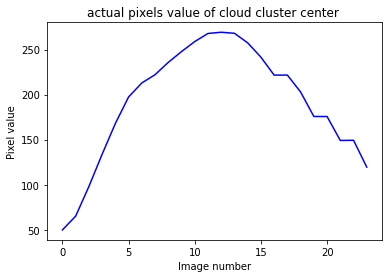

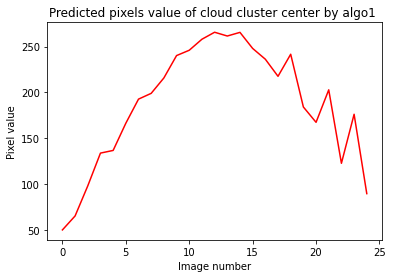

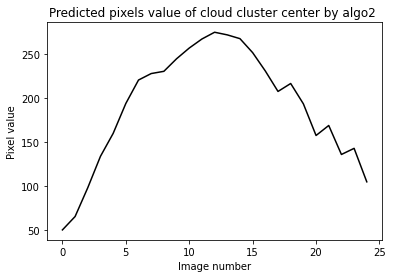

In [ ]:
for i in range(3,cmx.shape[0]):
  xt = (cmx[i-1]+cmx[i-2])/2
  xat = cmx[i]
  dx = xat-xt
  xt1 = ((xat+xt)/2)+dx
  cmx_predict2.append(xt1)
plt.plot(cmx,'blue')
plt.title("actual pixels value of cloud cluster center ")
plt.xlabel("Image number")
plt.ylabel("Pixel value")
plt.show()
plt.plot(cmx_predict,'red')
plt.title("Predicted pixels value of cloud cluster center by algo1 ")
plt.xlabel("Image number")
plt.ylabel("Pixel value")
plt.show()
plt.plot(cmx_predict2,'black')
plt.title("Predicted pixels value of cloud cluster center by algo2 ")
plt.xlabel("Image number")
plt.ylabel("Pixel value")
plt.show()

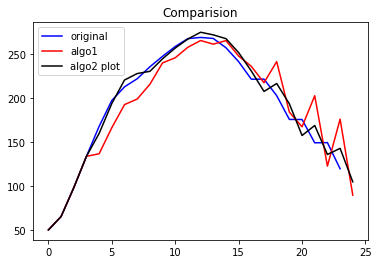

In [ ]:
plt.plot(cmx,'blue')
plt.plot(cmx_predict,'red')
plt.plot(cmx_predict2,'black')
plt.legend(['original','algo1',"algo2 plot"])
plt.title("Comparision")
plt.show()

In [ ]:
x=np.array(x)
y=np.array(y)
x_predict = []
y_predict = []


In [ ]:

for i in range(4):
  x_predict.append(x[i])
  y_predict.append(y[i])

In [ ]:
for i in range(3,x.shape[0]):
  dx = x[i-1]-x[i-2]
  xt = x[i-1]+dx
  xat = x[i]
  dx2 = xat - xt
  x_predict.append(xat+dx2)
  dy = y[i-1]-y[i-2]
  yt = y[i-1]+dy
  yat = y[i]
  dy2 = yat - yt
  y_predict.append(yat+dy2)


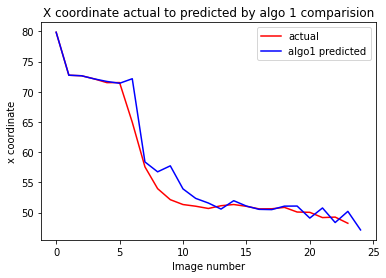

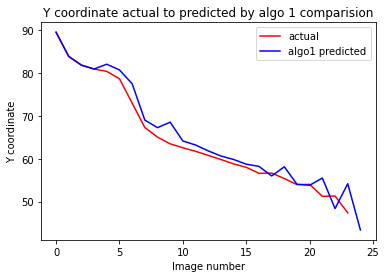

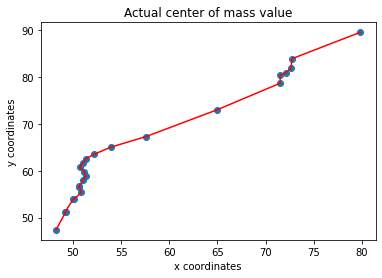

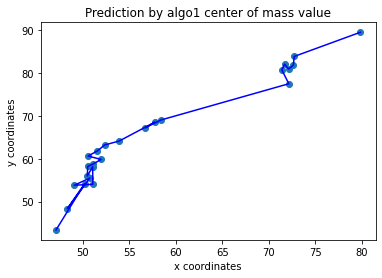

In [ ]:

plt.plot(x, 'r')
plt.plot(x_predict, 'b')
plt.title("X coordinate actual to predicted by algo 1 comparision")
plt.legend(['actual','algo1 predicted'])
plt.xlabel('Image number')
plt.ylabel('x coordinate')
plt.show()
plt.plot(y,'r')
plt.plot(y_predict, 'b')
plt.title("Y coordinate actual to predicted by algo 1 comparision")
plt.legend(['actual','algo1 predicted'])
plt.xlabel('Image number')
plt.ylabel('Y coordinate')
plt.show()
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.title("Actual center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()
plt.scatter(x_predict,y_predict)
plt.plot(x_predict,y_predict,'b')
plt.title("Prediction by algo1 center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

47.13888243501598 43.38175174699559


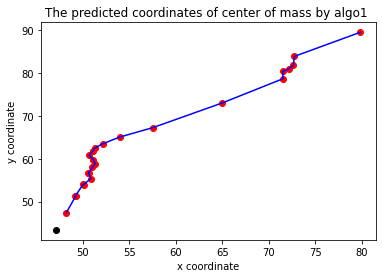

In [ ]:
plt.scatter(x,y,c="red")
plt.plot(x,y,'blue')
plt.title("The predicted coordinates of center of mass by algo1 ")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.scatter(x_predict[-1],y_predict[-1],c="black")
print(x_predict[-1],y_predict[-1])
plt.show()

In [ ]:
x_predict2 = []
y_predict2 = []

for i in range(4):
  x_predict2.append(x[i])
  y_predict2.append(y[i])

In [ ]:
for i in range(3,x.shape[0]):
  xt = (x[i-1]+x[i-2])/2
  yt = (y[i-1]+y[i-2])/2
  xat = x[i]
  yat = y[i]
  dx = xat-xt
  dy = yat-yt
  xt1 = ((xat+xt)/2)+dx
  yt1 = ((yat+yt)/2)+dy
  x_predict2.append(xt1)
  y_predict2.append(yt1)

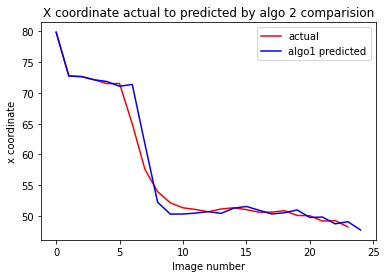

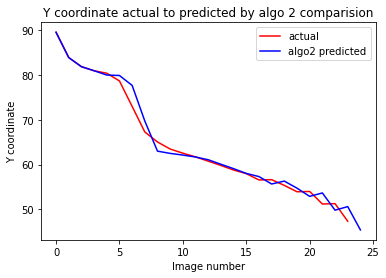

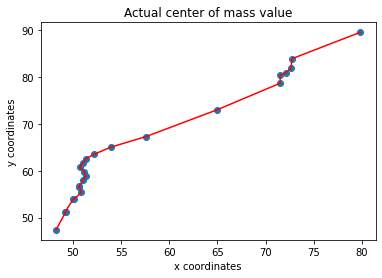

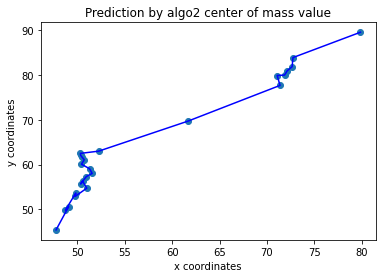

In [ ]:
plt.plot(x, 'r')
plt.plot(x_predict2, 'b')
plt.title("X coordinate actual to predicted by algo 2 comparision")
plt.legend(['actual','algo1 predicted'])
plt.xlabel('Image number')
plt.ylabel('x coordinate')
plt.show()
plt.plot(y,'r')
plt.plot(y_predict2, 'b')
plt.title("Y coordinate actual to predicted by algo 2 comparision")
plt.legend(['actual','algo2 predicted'])
plt.xlabel('Image number')
plt.ylabel('Y coordinate')
plt.show()
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.title("Actual center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()
plt.scatter(x_predict2,y_predict2)
plt.plot(x_predict2,y_predict2,'b')
plt.title("Prediction by algo2 center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

In [ ]:
print("Prediction of movement of cluster center\n")
print("Cloud cluster center moves to:",x_predict2[-1],y_predict2[-1])

Prediction of movement of cluster center

Cloud cluster center moves to: 47.74783655024994 45.44117224952405


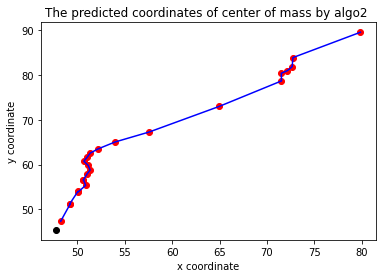

In [ ]:
plt.scatter(x,y,c="red")
plt.plot(x,y,'blue')
plt.scatter(x_predict2[-1],y_predict2[-1],c="black")
plt.title("The predicted coordinates of center of mass by algo2 ")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

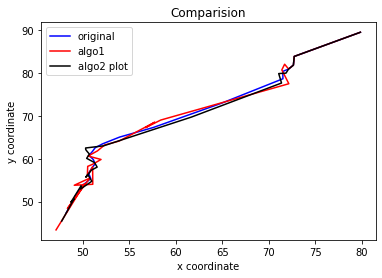

In [ ]:
plt.plot(x,y,'blue')
plt.plot(x_predict,y_predict,'red')
plt.plot(x_predict2,y_predict2,'black')
plt.legend(['original','algo1',"algo2 plot"])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.title("Comparision")
plt.show()

In [ ]:
data = [[]]
for i in range(x.shape[0]):
  dummy = []
  dummy.append(i)
  dummy.append((x[i],y[i]))
  dummy.append((x_predict[i],y_predict[i]))
  dummy.append((x[i]-x_predict[i],y[i]-y_predict[i]))
  data.append(dummy)

In [ ]:
data1 = [[]]
for i in range(x.shape[0]):
  dummy = []
  dummy.append(i)
  dummy.append((x[i],y[i]))
  dummy.append((x_predict2[i],y_predict2[i]))
  dummy.append((x[i]-x_predict2[i],y[i]-y_predict2[i]))
  data1.append(dummy)

In [ ]:
df = pd.DataFrame(data, columns = ["Image Number","Actual COM","Predicted COM", "Difference"]) 
df1 = pd.DataFrame(data1, columns = ["Image Number","Actual COM","Predicted COM", "Difference"])


In [ ]:
df


,Image Number,Actual COM,Predicted COM,Difference
0,NaN,None,None,None
1,0.0,"(79.85751978891821, 89.54089709762533)","(79.85751978891821, 89.54089709762533)","(0.0, 0.0)"
2,1.0,"(72.74475524475524, 83.89160839160839)","(72.74475524475524, 83.89160839160839)","(0.0, 0.0)"
3,2.0,"(72.65422696115765, 81.85986290936786)","(72.65422696115765, 81.85986290936786)","(0.0, 0.0)"
4,3.0,"(72.13762214983713, 80.95114006514657)","(72.13762214983713, 80.95114006514657)","(0.0, 0.0)"
5,4.0,"(71.51541095890411, 80.39554794520548)","(71.7115456221142, 82.07416270316581)","(-0.19613466321008843, -1.6786147579603323)"
6,5.0,"(71.52763385146805, 78.67875647668394)","(71.40980457929162, 80.74867866948567)","(0.11782927217643646, -2.0699221928017266)"
7,6.0,"(64.96549192364171, 72.99853157121879)","(72.16206793496501, 77.5175571281035)","(-7.196576011323302, -4.5190255568847135)"
8,7.0,"(57.57900874635568, 67.28862973760933)","(58.39112710325142, 69.03509813427517)","(-0.8121183568957377, -1.746468396665847)"
9,8.0,"(53.96906666666667, 65.05653333333333)","(56.754667496896005, 67.25895280946501)","(-2.7856008302293347, -2.2024194761316807)"


In [ ]:
df1


,Image Number,Actual COM,Predicted COM,Difference
0,NaN,None,None,None
1,0.0,"(79.85751978891821, 89.54089709762533)","(79.85751978891821, 89.54089709762533)","(0.0, 0.0)"
2,1.0,"(72.74475524475524, 83.89160839160839)","(72.74475524475524, 83.89160839160839)","(0.0, 0.0)"
3,2.0,"(72.65422696115765, 81.85986290936786)","(72.65422696115765, 81.85986290936786)","(0.0, 0.0)"
4,3.0,"(72.13762214983713, 80.95114006514657)","(72.13762214983713, 80.95114006514657)","(0.0, 0.0)"
5,4.0,"(71.51541095890411, 80.39554794520548)","(71.85668767327748, 79.9888422724758)","(-0.3412767143733646, 0.40670567272968583)"
6,5.0,"(71.52763385146805, 78.67875647668394)","(71.07515416060748, 79.89057117417961)","(0.4524796908605708, -1.2118146974956687)"
7,6.0,"(64.96549192364171, 72.99853157121879)","(71.37819250001677, 77.68146271243789)","(-6.412700576375059, -4.6829311412191)"
8,7.0,"(57.57900874635568, 67.28862973760933)","(61.687476682869516, 69.72922125135584)","(-4.108467936513833, -2.4405915137465115)"
9,8.0,"(53.96906666666667, 65.05653333333333)","(52.24523167575608, 63.0136225944383)","(1.7238349909105892, 2.0429107388950314)"


In [ ]:
s=0
s1=0
sy=0
sy1=0
for i in range(x.shape[0]):
  s+=(x[i]-x_predict[i])**2
  s1+=(x[i]-x_predict2[i])**2
  sy+=(y[i]-y_predict[i])**2
  sy1+=(y[i]-y_predict2[i])**2
print("Mean Square value for algo 1 for x and y coordinates are",s**0.5,sy**0.5)
print("Mean Square value for algo 1 for x and y coordinates are",s1**0.5,sy1**0.5)

Mean Square value for algo 1 for x and y coordinates are 10.521990429566877 12.355170310843146
Mean Square value for algo 1 for x and y coordinates are 8.327999062223777 7.627211704327536
